In [99]:
!pip install geopandas

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import folium

In [101]:
dane_gus_ludnosc_file = 'LUDN_2137_CTAB_20200620113159.csv'
dane_gus_bezrobocie_file = 'RYNE_1944_CTAB_20200620112914.csv'

In [102]:
ludnosc_gus = pd.read_csv(dane_gus_ludnosc_file, delimiter=';')
ludnosc_gus.head()

,Kod,Nazwa,ogółem;ogółem;2019;[osoba],Unnamed: 3
0,0,POLSKA,38382576,NaN
1,10000000000,MAKROREGION POŁUDNIOWY,7928536,NaN
2,11200000000,MAŁOPOLSKIE,3410901,NaN
3,11210000000,REGION MAŁOPOLSKIE,3410901,NaN
4,11212000000,PODREGION KRAKOWSKI,734873,NaN


In [103]:
ludnosc_gus = ludnosc_gus.iloc[:, 0:3]
ludnosc_gus.columns = ['Kod', 'Nazwa', 'Ludnosc']
ludnosc_gus.head()

,Kod,Nazwa,Ludnosc
0,0,POLSKA,38382576
1,10000000000,MAKROREGION POŁUDNIOWY,7928536
2,11200000000,MAŁOPOLSKIE,3410901
3,11210000000,REGION MAŁOPOLSKIE,3410901
4,11212000000,PODREGION KRAKOWSKI,734873


In [104]:
bezrobocie_gus = pd.read_csv(dane_gus_bezrobocie_file, delimiter=';')
bezrobocie_gus.head()

,Kod,Nazwa,ogółem;2019;[osoba],Unnamed: 3
0,0,POLSKA,866374,NaN
1,10000000000,MAKROREGION POŁUDNIOWY,129131,NaN
2,11200000000,MAŁOPOLSKIE,62610,NaN
3,11210000000,REGION MAŁOPOLSKIE,62610,NaN
4,11212000000,PODREGION KRAKOWSKI,9871,NaN


In [105]:
bezrobocie_gus = bezrobocie_gus.iloc[:, [0, 2]]
bezrobocie_gus.columns = ['Kod', 'Bezrobotni']
bezrobocie_gus.head()

,Kod,Bezrobotni
0,0,866374
1,10000000000,129131
2,11200000000,62610
3,11210000000,62610
4,11212000000,9871


In [106]:
# łączymy dane ze sobą - tylko te kody Kod, które istnieją w obu tabelach
dane_gus = pd.merge(ludnosc_gus, bezrobocie_gus, how='inner', on='Kod')
 
# liczymy stopę bezrobocia:
dane_gus['Stopa_bezrobocia'] = 100* dane_gus['Bezrobotni'] / dane_gus['Ludnosc']
 
# 10 przykładowych wierszy:
dane_gus.sample(10)

,Kod,Nazwa,Ludnosc,Bezrobotni,Stopa_bezrobocia
653,20811404045,Kożuchów - obszar wiejski (5),6525,221,3.386973
4178,71427126082,Siedlce (2),18406,296,1.608171
973,23015911024,Czempiń - miasto (4),5307,46,0.866780
1714,30210418022,Malczyce (2),5952,117,1.965726
4119,71427019082,Mała Wieś (2),5968,168,2.815013
3139,60611018054,Lubycza Królewska - miasto (4),2440,99,4.057377
2180,42214005062,Stężyca (2),10664,111,1.040885
2855,52615204155,Pierzchnica - obszar wiejski (5),3522,150,4.258944
2222,42214101032,Czarna Dąbrówka (2),5917,235,3.971607
3016,52615313065,Włoszczowa - obszar wiejski (5),9368,293,3.127669


In [107]:
# mapa z województwami:
mapa_woj = gpd.read_file('wojewodztwa.shp')
mapa_woj

,JPT_SJR_KO,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,JPT_NAZWA1,JPT_ORGAN1,JPT_WAZNA_,ID_BUFORA_,ID_BUFORA1,ID_TECHNIC,IIP_PRZEST,IIP_IDENTY,IIP_WERSJA,JPT_KJ_IIP,JPT_KJ_I_1,JPT_KJ_I_2,JPT_OPIS,JPT_SPS_KO,ID_BUFOR_1,JPT_ID,JPT_KJ_I_3,Shape_Leng,Shape_Area,geometry
0,WOJ,24,ÅlÄ skie,None,0,2017-10-10,None,2012-09-26,None,None,None,NZN,BRK,13890.0,0.0,1331323,PL.PZGIK.200,98a63fe6-1e56-4d05-9c47-ab4233f8a6ff,2017-10-10T00:00:00+02:00,EGIB,24,None,None,UZG,0,1331323,None,12.136952,1.557335,"MULTIPOLYGON (((18.91685 51.09608, 18.91677 51..."
1,WOJ,16,opolskie,None,0,2017-10-10,None,2012-09-26,None,None,None,NZN,BRK,13890.0,0.0,1331326,PL.PZGIK.200,9bd0c42a-ca40-4b7d-9b5b-81aae3398015,2017-10-10T00:00:00+02:00,EGIB,16,None,None,UZG,0,1331326,None,9.005207,1.196205,"POLYGON ((17.81203 51.18669, 17.81209 51.18670..."
2,WOJ,30,wielkopolskie,None,0,2016-05-05,None,2012-09-26,None,None,None,NZN,NZN,21408.0,0.0,829372,PL.PZGIK.200,c606b01a-76c8-480d-9470-f24ca0d7a613,2016-05-05T18:20:48+02:00,EGIB,30,None,None,UZG,0,1311516,None,18.408173,3.932196,"POLYGON ((16.71447 53.29913, 16.71447 53.29920..."
3,WOJ,26,ÅwiÄtokrzyskie,None,0,2012-09-26,None,2012-09-26,None,None,None,NZN,NZN,13890.0,0.0,829374,PL.PZGIK.200,d021c0dd-b22e-4fcd-8444-904c64ec3aa8,2012-09-27T13:45:13+02:00,EGIB,26,None,None,UZG,0,829374,None,9.264959,1.491827,"POLYGON ((19.70430 50.75239, 19.70443 50.75248..."
4,WOJ,22,pomorskie,None,0,2020-04-09,None,2012-09-26,None,None,None,NZN,NZN,165374.0,0.0,829375,PL.PZGIK.200,ece93e09-0215-42f3-8067-be0649f58d46,2020-04-09T13:57:03+02:00,EGIB,22,None,None,UZG,0,1358902,None,13.167595,2.520630,"POLYGON ((17.66483 54.78297, 17.66653 54.78334..."
5,WOJ,04,kujawsko-pomorskie,None,0,2012-09-26,None,2012-09-26,None,None,None,NZN,NZN,13890.0,0.0,829380,PL.PZGIK.200,c26354a4-3043-4ca9-9105-df6f0f9c1d93,2012-09-27T13:45:13+02:00,EGIB,04,None,None,UZG,0,829380,None,12.394906,2.409414,"POLYGON ((17.65670 53.57115, 17.65672 53.57115..."
6,WOJ,20,podlaskie,None,0,2019-03-21,None,2012-09-26,None,None,None,NZN,BRK,112209.0,0.0,1331324,PL.PZGIK.200,53ad7aea-d9d3-40c9-9a5c-ff737d5b076e,2019-03-21T09:53:34+01:00,EGIB,20,None,None,UZG,0,1353685,None,11.101166,2.718484,"POLYGON ((21.98108 52.97859, 21.98078 52.97861..."
7,WOJ,32,zachodniopomorskie,None,0,2020-04-24,None,2012-09-26,None,None,None,NZN,BRK,166475.0,0.0,1331322,PL.PZGIK.200,c3f2202a-b491-49c5-a3af-d581108d939a,2020-04-24T13:47:42+02:00,EGIB,32,None,None,UZG,0,1358951,None,12.137158,3.107549,"POLYGON ((14.81157 54.04037, 14.89525 54.05570..."
8,WOJ,02,dolnoÅlÄ skie,None,0,2018-09-25,None,2012-09-26,None,None,None,NZN,BRK,90320.0,0.0,1331328,PL.PZGIK.200,f1ef3856-09ba-4e3d-af9d-a876794d570f,2018-09-25T11:27:46+02:00,EGIB,02,None,None,UZG,0,1348257,None,13.844520,2.559175,"POLYGON ((15.10534 51.42730, 15.10540 51.42732..."
9,WOJ,18,podkarpackie,None,0,2017-10-10,None,2012-09-26,None,None,None,NZN,BRK,13890.0,0.0,1331325,PL.PZGIK.200,833fe14b-fe8e-40c7-9e4e-fc27c938bb11,2017-10-10T00:00:00+02:00,EGIB,18,None,None,UZG,0,1331325,None,11.220452,2.235693,"POLYGON ((22.03538 50.80675, 22.03550 50.80681..."


In [108]:
mapa_woj = mapa_woj[['JPT_KOD_JE',"JPT_NAZWA_", "geometry"]]
mapa_woj

,JPT_KOD_JE,JPT_NAZWA_,geometry
0,24,ÅlÄ skie,"MULTIPOLYGON (((18.91685 51.09608, 18.91677 51..."
1,16,opolskie,"POLYGON ((17.81203 51.18669, 17.81209 51.18670..."
2,30,wielkopolskie,"POLYGON ((16.71447 53.29913, 16.71447 53.29920..."
3,26,ÅwiÄtokrzyskie,"POLYGON ((19.70430 50.75239, 19.70443 50.75248..."
4,22,pomorskie,"POLYGON ((17.66483 54.78297, 17.66653 54.78334..."
5,04,kujawsko-pomorskie,"POLYGON ((17.65670 53.57115, 17.65672 53.57115..."
6,20,podlaskie,"POLYGON ((21.98108 52.97859, 21.98078 52.97861..."
7,32,zachodniopomorskie,"POLYGON ((14.81157 54.04037, 14.89525 54.05570..."
8,02,dolnoÅlÄ skie,"POLYGON ((15.10534 51.42730, 15.10540 51.42732..."
9,18,podkarpackie,"POLYGON ((22.03538 50.80675, 22.03550 50.80681..."


In [109]:
dane_gus['TERYT_woj'] = dane_gus.Kod.apply(lambda x: '0'+str(x) if len(str(x)) < 7 else str(x))

dane_gus

,Kod,Nazwa,Ludnosc,Bezrobotni,Stopa_bezrobocia,TERYT_woj
0,0,POLSKA,38382576,866374,2.257206,00
1,10000000000,MAKROREGION POŁUDNIOWY,7928536,129131,1.628687,10000000000
2,11200000000,MAŁOPOLSKIE,3410901,62610,1.835585,11200000000
3,11210000000,REGION MAŁOPOLSKIE,3410901,62610,1.835585,11210000000
4,11212000000,PODREGION KRAKOWSKI,734873,9871,1.343225,11212000000
...,...,...,...,...,...,...
4242,71427338024,Mszczonów - miasto (4),6343,158,2.490935,71427338024
4243,71427338025,Mszczonów - obszar wiejski (5),5182,152,2.933230,71427338025
4244,71427338032,Puszcza Mariańska (2),8661,316,3.648539,71427338032
4245,71427338042,Radziejowice (2),5855,175,2.988898,71427338042


In [110]:
dane_gus = dane_gus[dane_gus.TERYT_woj.str[3:7] == '0000']
dane_gus_woj = dane_gus[dane_gus.TERYT_woj.str[1:3] != '00']

dane_gus_woj.loc[dane_gus_woj["Nazwa"] == "ŚLĄSKIE", ['TERYT_woj']] = '24'
dane_gus_woj.loc[dane_gus_woj["Nazwa"] == "MAŁOPOLSKIE", ['TERYT_woj']] = '12'
dane_gus_woj.loc[dane_gus_woj["Nazwa"] == "LUBUSKIE", ['TERYT_woj']] = '08'
dane_gus_woj.loc[dane_gus_woj["Nazwa"] == "WIELKOPOLSKIE", ['TERYT_woj']] = '30'
dane_gus_woj.loc[dane_gus_woj["Nazwa"] == "ZACHODNIOPOMORSKIE", ['TERYT_woj']] = '32'
dane_gus_woj.loc[dane_gus_woj["Nazwa"] == "DOLNOŚLĄSKIE", ['TERYT_woj']] = '02'
dane_gus_woj.loc[dane_gus_woj["Nazwa"] == "OPOLSKIE", ['TERYT_woj']] = '16'
dane_gus_woj.loc[dane_gus_woj["Nazwa"] == "KUJAWSKO-POMORSKIE", ['TERYT_woj']] = '04'
dane_gus_woj.loc[dane_gus_woj["Nazwa"] == "POMORSKIE", ['TERYT_woj']] = '22'
dane_gus_woj.loc[dane_gus_woj["Nazwa"] == "WARMIŃSKO-MAZURSKIE", ['TERYT_woj']] = '28'
dane_gus_woj.loc[dane_gus_woj["Nazwa"] == "ŁÓDZKIE", ['TERYT_woj']] = '10'
dane_gus_woj.loc[dane_gus_woj["Nazwa"] == "ŚWIĘTOKRZYSKIE", ['TERYT_woj']] = '26'
dane_gus_woj.loc[dane_gus_woj["Nazwa"] == "LUBELSKIE", ['TERYT_woj']] = '06'
dane_gus_woj.loc[dane_gus_woj["Nazwa"] == "PODKARPACKIE", ['TERYT_woj']] = '18'
dane_gus_woj.loc[dane_gus_woj["Nazwa"] == "PODLASKIE", ['TERYT_woj']] = '20'
dane_gus_woj.loc[dane_gus_woj["Nazwa"] == "MAZOWIECKIE", ['TERYT_woj']] = '14'


dane_gus_woj

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Kod,Nazwa,Ludnosc,Bezrobotni,Stopa_bezrobocia,TERYT_woj
2,11200000000,MAŁOPOLSKIE,3410901,62610,1.835585,12
310,12400000000,ŚLĄSKIE,4517635,66521,1.472474,24
568,20800000000,LUBUSKIE,1011592,18498,1.828603,08
736,23000000000,WIELKOPOLSKIE,3498733,46313,1.323708,30
1193,23200000000,ZACHODNIOPOMORSKIE,1696193,41771,2.462632,32
1444,30200000000,DOLNOŚLĄSKIE,2900163,56022,1.931685,02
1762,31600000000,OPOLSKIE,982626,20948,2.131839,16
1916,40400000000,KUJAWSKO-POMORSKIE,2072373,64060,3.091142,04
2160,42200000000,POMORSKIE,2343928,41817,1.784057,22
2350,42800000000,WARMIŃSKO-MAZURSKIE,1422737,45731,3.214298,28


In [111]:
# łączymy tabelę opisującą kształt województw z danymi o bezrobosiu w województwach
dane_mapa_woj = pd.merge(mapa_woj, dane_gus_woj, how='left', left_on='JPT_KOD_JE', right_on='TERYT_woj')
del dane_mapa_woj['JPT_NAZWA_']
del dane_mapa_woj['JPT_KOD_JE']
dane_mapa_woj


,geometry,Kod,Nazwa,Ludnosc,Bezrobotni,Stopa_bezrobocia,TERYT_woj
0,"MULTIPOLYGON (((18.91685 51.09608, 18.91677 51...",12400000000,ŚLĄSKIE,4517635,66521,1.472474,24
1,"POLYGON ((17.81203 51.18669, 17.81209 51.18670...",31600000000,OPOLSKIE,982626,20948,2.131839,16
2,"POLYGON ((16.71447 53.29913, 16.71447 53.29920...",23000000000,WIELKOPOLSKIE,3498733,46313,1.323708,30
3,"POLYGON ((19.70430 50.75239, 19.70443 50.75248...",52600000000,ŚWIĘTOKRZYSKIE,1233961,42042,3.407077,26
4,"POLYGON ((17.66483 54.78297, 17.66653 54.78334...",42200000000,POMORSKIE,2343928,41817,1.784057,22
5,"POLYGON ((17.65670 53.57115, 17.65672 53.57115...",40400000000,KUJAWSKO-POMORSKIE,2072373,64060,3.091142,04
6,"POLYGON ((21.98108 52.97859, 21.98078 52.97861...",62000000000,PODLASKIE,1178353,33277,2.824026,20
7,"POLYGON ((14.81157 54.04037, 14.89525 54.05570...",23200000000,ZACHODNIOPOMORSKIE,1696193,41771,2.462632,32
8,"POLYGON ((15.10534 51.42730, 15.10540 51.42732...",30200000000,DOLNOŚLĄSKIE,2900163,56022,1.931685,02
9,"POLYGON ((22.03538 50.80675, 22.03550 50.80681...",61800000000,PODKARPACKIE,2127164,75455,3.547211,18


In [112]:
dane_gus_rozwody_file = 'LUDN_1971_CTAB_20200620184427.csv'

In [113]:
rozwody_gus = pd.read_csv(dane_gus_rozwody_file, delimiter=';')
rozwody_gus.head()

,Kod,Nazwa,ogółem;2019;[-],Unnamed: 3
0,200000,DOLNOŚLĄSKIE,6058,NaN
1,400000,KUJAWSKO-POMORSKIE,3759,NaN
2,600000,LUBELSKIE,3404,NaN
3,800000,LUBUSKIE,1770,NaN
4,1000000,ŁÓDZKIE,4859,NaN


In [114]:
rozwody_gus = rozwody_gus.iloc[:, 0:3]
rozwody_gus.columns = ['Kod', 'Nazwa', 'Rozwody']
rozwody_gus

,Kod,Nazwa,Rozwody
0,200000,DOLNOŚLĄSKIE,6058
1,400000,KUJAWSKO-POMORSKIE,3759
2,600000,LUBELSKIE,3404
3,800000,LUBUSKIE,1770
4,1000000,ŁÓDZKIE,4859
5,1200000,MAŁOPOLSKIE,4708
6,1400000,MAZOWIECKIE,9181
7,1600000,OPOLSKIE,1583
8,1800000,PODKARPACKIE,2568
9,2000000,PODLASKIE,2086


In [115]:
dane_rozwody_woj = pd.merge(dane_mapa_woj, rozwody_gus, how='inner', on='Nazwa')

# liczymy stopę rozwodów:
dane_rozwody_woj['Stopa_rozwodow'] = 100* dane_rozwody_woj['Rozwody'] / dane_rozwody_woj['Ludnosc']
del dane_rozwody_woj['Kod_x']
del dane_rozwody_woj['Kod_y']
dane_rozwody_woj 

,geometry,Nazwa,Ludnosc,Bezrobotni,Stopa_bezrobocia,TERYT_woj,Rozwody,Stopa_rozwodow
0,"MULTIPOLYGON (((18.91685 51.09608, 18.91677 51...",ŚLĄSKIE,4517635,66521,1.472474,24,7965,0.176309
1,"POLYGON ((17.81203 51.18669, 17.81209 51.18670...",OPOLSKIE,982626,20948,2.131839,16,1583,0.161099
2,"POLYGON ((16.71447 53.29913, 16.71447 53.29920...",WIELKOPOLSKIE,3498733,46313,1.323708,30,5809,0.166032
3,"POLYGON ((19.70430 50.75239, 19.70443 50.75248...",ŚWIĘTOKRZYSKIE,1233961,42042,3.407077,26,1462,0.118480
4,"POLYGON ((17.66483 54.78297, 17.66653 54.78334...",POMORSKIE,2343928,41817,1.784057,22,3303,0.140917
5,"POLYGON ((17.65670 53.57115, 17.65672 53.57115...",KUJAWSKO-POMORSKIE,2072373,64060,3.091142,04,3759,0.181386
6,"POLYGON ((21.98108 52.97859, 21.98078 52.97861...",PODLASKIE,1178353,33277,2.824026,20,2086,0.177027
7,"POLYGON ((14.81157 54.04037, 14.89525 54.05570...",ZACHODNIOPOMORSKIE,1696193,41771,2.462632,32,3141,0.185179
8,"POLYGON ((15.10534 51.42730, 15.10540 51.42732...",DOLNOŚLĄSKIE,2900163,56022,1.931685,02,6058,0.208885
9,"POLYGON ((22.03538 50.80675, 22.03550 50.80681...",PODKARPACKIE,2127164,75455,3.547211,18,2568,0.120724


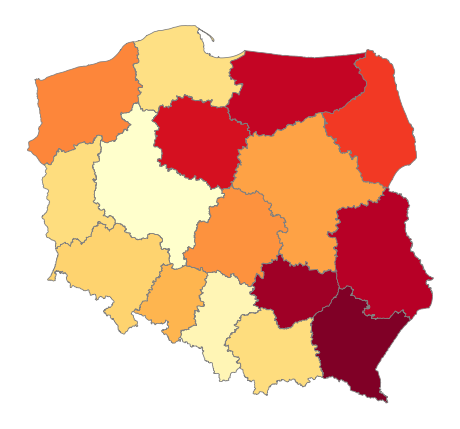

In [116]:
## rysujemy mapkę bezrobocia:
dane_mapa_woj = dane_mapa_woj.to_crs(epsg=2180)
 
fig, ax = plt.subplots(1, figsize = (8,8))
dane_mapa_woj.plot(column='Stopa_bezrobocia', ax=ax, cmap='YlOrRd', linewidth=0.8, edgecolor='gray')
ax.axis('off')

# pokazujemy obrazek
plt.show()

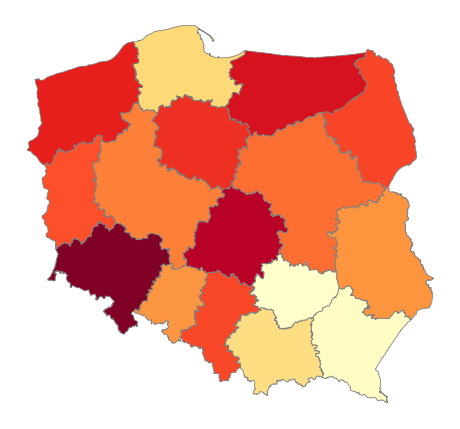

In [117]:
# rysujemy mapkę rozwodów:
dane_rozwody_woj = dane_rozwody_woj.to_crs(epsg=2180)
 
fig, ax = plt.subplots(1, figsize = (8,8))
dane_rozwody_woj.plot(column='Stopa_rozwodow', ax=ax, cmap='YlOrRd', linewidth=0.8, edgecolor='gray')
ax.axis('off')

# pokazujemy obrazek
plt.show()

In [118]:
Stopa_bezrobocia = dane_rozwody_woj["Stopa_bezrobocia"]
Stopa_rozwodow = dane_rozwody_woj["Stopa_rozwodow"]
korelacja = Stopa_bezrobocia.corr(Stopa_rozwodow)

korelacja

-0.25401105618898806

#Korelacja jest ujemna, więc, więc ze wzrostem bezrobocia spada liczba rozwodów. Oczywiście nie należy szukać w tym przypadku przyczynowości. Korelacja jest na tyle mała, że można uznać za brak korelacji między tymi wartościami.